In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd


In [3]:

df=pd.read_excel('/content/drive/MyDrive/Raisin_Dataset/Raisin_Dataset.xlsx')
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


LINEAR REGRESSION:

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report


X = df.drop('Class', axis=1)
y = df['Class']


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251
...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548


In [9]:

df['Class'] = df['Class'].map({'Kecimen': 0, 'Besni': 1})
X = df.drop('Class', axis=1)  # Features
y = df['Class']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



In [15]:
threshold = 0.5
y_pred_binary = []
for pred in y_pred:
    if pred >= threshold:
        y_pred_binary.append(1)
    else:
        y_pred_binary.append(0)

accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred_binary))


Accuracy: 0.8666666666666667
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        94
           1       0.84      0.88      0.86        86

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180



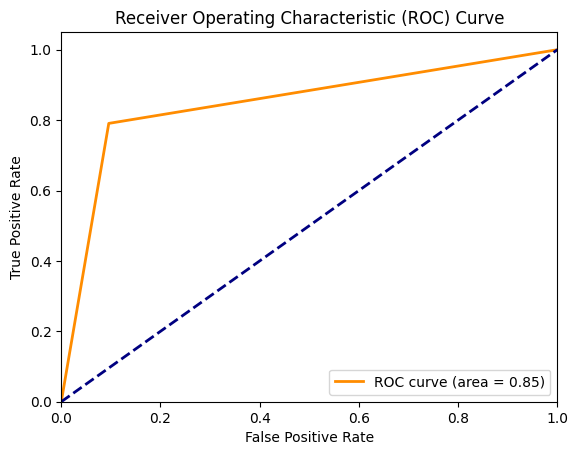

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


threshold = 0.5
y_pred_binary = np.where(y_pred >= threshold, 1, 0)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


KNN

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_excel('/content/drive/MyDrive/Raisin_Dataset/Raisin_Dataset.xlsx')
data['Class'] = data['Class'].map({'Kecimen': 0, 'Besni': 1})

X = data.drop('Class', axis=1)
y = data['Class']



In [22]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 10
model = KNeighborsClassifier(n_neighbors=k)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))


Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        94
           1       0.87      0.80      0.84        86

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180



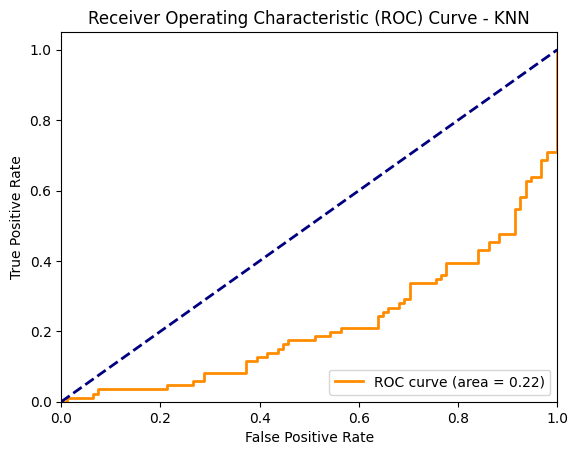

In [74]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
distances, indices = knn_model.kneighbors(X_test)
pseudo_probabilities = 1 / (1 + distances)
y_pred_proba = pseudo_probabilities.max(axis=1)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend(loc="lower right")
plt.show()



NAIVE BAYES:

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_excel('/content/drive/MyDrive/Raisin_Dataset/Raisin_Dataset.xlsx')

data['Class'] = data['Class'].map({'Kecimen': 0, 'Besni': 1})

X = data.drop('Class', axis=1)
y = data['Class']


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)




Accuracy: 0.8277777777777777


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


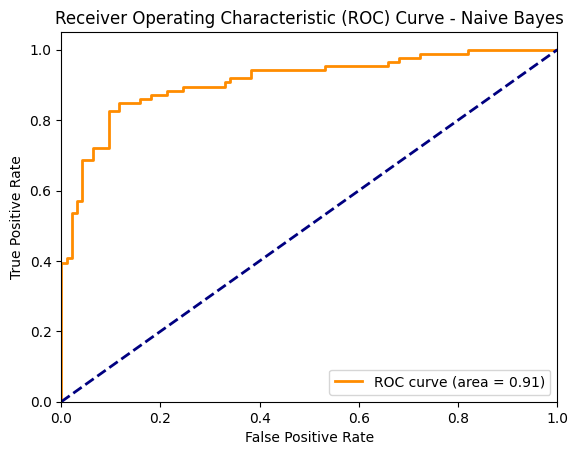

In [86]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

if hasattr(model, "decision_function"):
    y_scores = model.decision_function(X_test)
else:
    y_scores = model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Naive Bayes')
plt.legend(loc="lower right")
plt.show()


PLA:

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_excel('/content/drive/MyDrive/Raisin_Dataset/Raisin_Dataset.xlsx')

data['Class'] = data['Class'].map({'Kecimen': 0, 'Besni': 1})

X = data.drop('Class', axis=1)
y = data['Class']

In [91]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model1 = Perceptron()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)








Accuracy: 0.4777777777777778


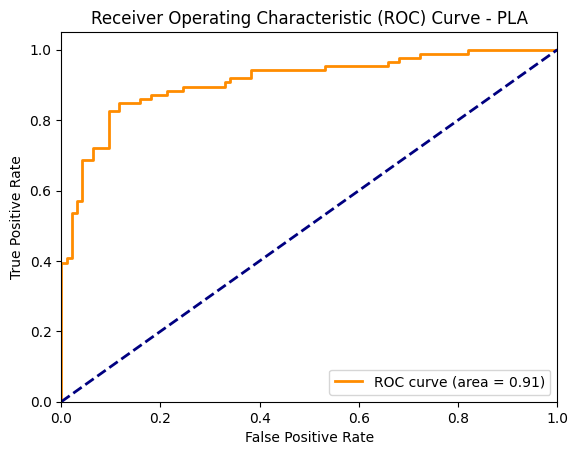

In [93]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_scores = model1.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - PLA')
plt.legend(loc="lower right")
plt.show()


MLP:


In [53]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

data = pd.read_excel('/content/drive/MyDrive/Raisin_Dataset/Raisin_Dataset.xlsx')

data['Class'] = data['Class'].map({'Kecimen': 0, 'Besni': 1})

X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6055555555555555


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


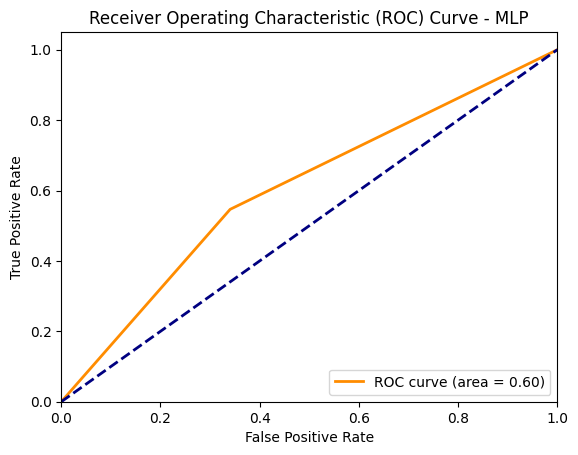

In [90]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


y_scores =mlp.decision_function(X_test) if hasattr(mlp, 'decision_function') else mlp.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_scores)


roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - MLP')
plt.legend(loc="lower right")
plt.show()


SVM:

In [59]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

data = pd.read_excel('/content/drive/MyDrive/Raisin_Dataset/Raisin_Dataset.xlsx')

data['Class'] = data['Class'].map({'Kecimen': 0, 'Besni': 1})

X = data.drop('Class', axis=1)
y = data['Class']

svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.85


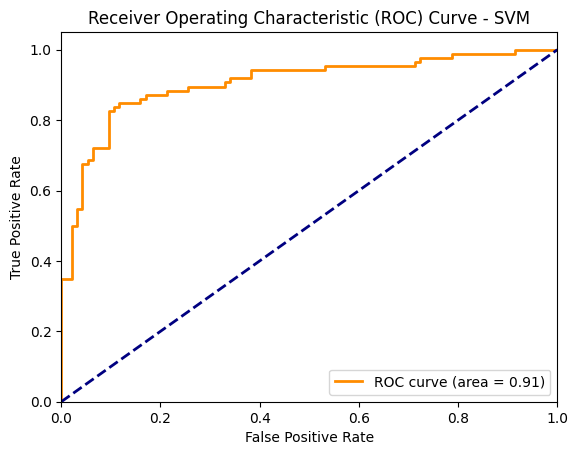

In [94]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_scores = svm.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM')
plt.legend(loc="lower right")
plt.show()


Better model so far:

-Linear regresssion

-SVM




